In [1]:
!pwd
!ls -la
!mkdir image
!pwd
!ls -la

/content
total 16
drwxr-xr-x 1 root root 4096 Oct 24 13:20 .
drwxr-xr-x 1 root root 4096 Oct 27 13:00 ..
drwxr-xr-x 4 root root 4096 Oct 24 13:20 .config
drwxr-xr-x 1 root root 4096 Oct 24 13:20 sample_data
/content
total 20
drwxr-xr-x 1 root root 4096 Oct 27 13:01 .
drwxr-xr-x 1 root root 4096 Oct 27 13:00 ..
drwxr-xr-x 4 root root 4096 Oct 24 13:20 .config
drwxr-xr-x 2 root root 4096 Oct 27 13:01 image
drwxr-xr-x 1 root root 4096 Oct 24 13:20 sample_data


# 這是程式第一段
我要去把K線圖所繪製出來

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
taiwan_2330_stock = yf.Ticker("2330.TW")      ## 我以台積電作為我的股票
data  = taiwan_2330_stock.history(period="5y")   ## 我抓取的時間是一年

In [4]:
K_data = data[['Open','Close','High','Low']]

In [5]:
i_number = 0
ten_data = []

In [6]:
for i in range(len(K_data.values) - 19):
    #print(i)
    ten_data.append([])
    ten_data[i].append(K_data.values[i:i+20])

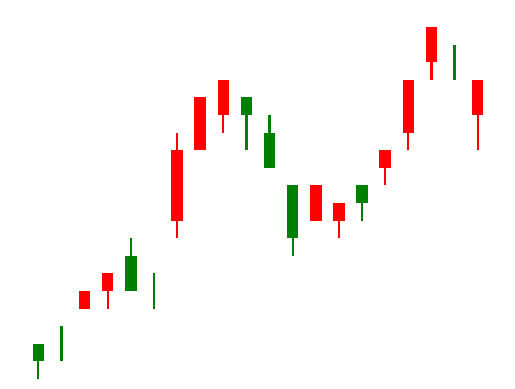

In [7]:
for idx1, ten_day in enumerate(ten_data):

    ## 這裡是要判斷下次是漲還是跌
    if idx1 < len(ten_data) -1 :
        ## 取得下次的20 天 的值 ， 要判斷下次是漲，還是迭
        next_ten = ten_data[idx1 + 1][0]
        #print(next_ten)
        next_close_list = []
        for next_one in next_ten:
            next_one_close = next_one[1]  ## 是看收盤價
            next_close_list.append(next_one_close)
        # 計算平均值
        MA20 = sum(next_close_list) / len(next_close_list) if next_close_list else 0
        MA10 = sum(next_close_list[-10:])/len(next_close_list[-10:]) if next_close_list[-10: ] else 0
        #ans = ['漲' if MA10 > MA20 else '跌']
        rise_fail_ans = 'rise' if MA10 > MA20 else 'fail'
        #print(rise_fail_ans)
    else:  # 最後一次沒有下次，我要壤它跳開了
        break

    #這裡是處理K線圖
    for indx2, one_day in enumerate(ten_day[0]):
        #print(one_day)
        open_price = int(one_day[0])
        close_price = int(one_day[1])
        high_price = int(one_day[2])
        low_price = int(one_day[3])

        ## 決定陰線(下跌)或陽線(上長)
        color = "green"
        if close_price > open_price:
            color = "red"

        #plt.title(rise_fail_ans)
        plt.axis('off')
        plt.xticks([])
        plt.yticks([])
        #plt.ylim(0,10)
        #化陰陽線
        plt.bar(indx2,
                abs(open_price - close_price),
                bottom= min(open_price,close_price),
                color=color,
                width=0.5)
        #畫影線
        plt.bar(indx2, high_price- low_price,
                bottom=low_price,
                color=color,
                width=0.1)

    formatted_number = "{:05d}".format(idx1) ## 保持輸出的數字漂亮
    # 儲存圖片
    plt.savefig('image/'+str(formatted_number)+'_'+str(rise_fail_ans)+'.png', format='png', dpi=100)  # 儲存為 PNG 格式，解析度為 300 dp
    if idx1 == 0:
      plt.show()
    plt.close()


# 這是程式第大二段
我要分類訓練集與測試集圖片

In [8]:
import os
import random
import shutil ## 這是搬移圖片用的。
image_list = os.listdir('./image/')

In [9]:
## 我要打亂圖片順序
random.seed(2)
random.shuffle(image_list)  # 這個前面不能寫等於。
train_size = int(len(image_list) * 0.8 )
train_list = image_list[:train_size]
test_list = image_list[train_size:]

In [10]:
train_rise_folder_path = './train_folder_path/rise'
train_fail_folder_path = './train_folder_path/fail'
test_rise_folder_path = './test_folder_path/rise'
test_fail_folder_path = './test_folder_path/fali'


In [11]:
if not os.path.exists(train_rise_folder_path):
    os.makedirs(train_rise_folder_path)
    print(f"資料夾{train_rise_folder_path} 已建立。")

# 檢查資料是否存在，不存在則建立
if not os.path.exists(train_fail_folder_path):
    os.makedirs(train_fail_folder_path)
    print(f"資料夾{train_fail_folder_path} 已建立。")

# 檢查資料是否存在，不存在則建立
if not os.path.exists(test_rise_folder_path):
    os.makedirs(test_rise_folder_path)
    print(f"資料夾{test_rise_folder_path} 已建立。")

# 檢查資料是否存在，不存在則建立
if not os.path.exists(test_fail_folder_path):
    os.makedirs(test_fail_folder_path)
    print(f"資料夾{test_fail_folder_path} 已建立。")

資料夾./train_folder_path/rise 已建立。
資料夾./train_folder_path/fail 已建立。
資料夾./test_folder_path/rise 已建立。
資料夾./test_folder_path/fali 已建立。


In [12]:
# 複製train圖片到train資料夾
for train_image in train_list:
    #print(train_image)
    #print(train_image[6:10])
    src_path = os.path.join('./image/',train_image) ## 假設圖片在 source_folder 中
    if train_image[6:10] == 'rise' :
        dest_path = os.path.join(train_rise_folder_path+'/', train_image)
    if train_image[6:10] == 'fail' :
        dest_path = os.path.join(train_fail_folder_path+'/', train_image)
    shutil.copy(src_path, dest_path)
    #print(f"已複製{train_image}至{dest_path}/")

In [13]:
# 複製test圖片到test資料夾
for test_image in test_list:
    src_path = os.path.join('./image/',test_image) ## 假設圖片在 source_folder 中
    if test_image[6:10] == 'rise':
        dest_path = os.path.join(test_rise_folder_path+'/', test_image)
    if test_image[6:10] == 'fail':
        dest_path = os.path.join(test_fail_folder_path+'/', test_image)

    shutil.copy(src_path, dest_path)
    print(f"已複製{test_image}至{dest_path}/")

已複製01134_rise.png至./test_folder_path/rise/01134_rise.png/
已複製01008_rise.png至./test_folder_path/rise/01008_rise.png/
已複製00075_fail.png至./test_folder_path/fali/00075_fail.png/
已複製01124_rise.png至./test_folder_path/rise/01124_rise.png/
已複製00447_fail.png至./test_folder_path/fali/00447_fail.png/
已複製00433_rise.png至./test_folder_path/rise/00433_rise.png/
已複製00604_fail.png至./test_folder_path/fali/00604_fail.png/
已複製00796_fail.png至./test_folder_path/fali/00796_fail.png/
已複製00772_rise.png至./test_folder_path/rise/00772_rise.png/
已複製00966_rise.png至./test_folder_path/rise/00966_rise.png/
已複製00207_rise.png至./test_folder_path/rise/00207_rise.png/
已複製01043_rise.png至./test_folder_path/rise/01043_rise.png/
已複製00290_rise.png至./test_folder_path/rise/00290_rise.png/
已複製00860_rise.png至./test_folder_path/rise/00860_rise.png/
已複製01077_fail.png至./test_folder_path/fali/01077_fail.png/
已複製00862_rise.png至./test_folder_path/rise/00862_rise.png/
已複製00630_fail.png至./test_folder_path/fali/00630_fail.png/
已複製00135_rise.

In [14]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [15]:
# 檢查 GPU 是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)  # 顯示使用的裝置

Using device: cuda


# 這是程式第三段
我要訓練CNN 網路

In [16]:
# 定義轉換
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # 調整圖片大小
    transforms.ToTensor()
])

# 讀取訓練和驗證資料
train_data = datasets.ImageFolder(root='train_folder_path/', transform=transform)
#print(train_data)
test_data = datasets.ImageFolder(root='test_folder_path/', transform=transform)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
#print(train_loader)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)


In [17]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [18]:
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        ## Convolution 1 , input_shape=(3,128, 128)
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0) #捲機後的大小(16, 124,124) ，算法 (128-5)/ 1 + 1 = 124
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0) ## 捲機後的大小(32, 120, 120 )  ，算法 (124 - 5 ) /1 + 1 = 120
        self.relu1 = nn.ReLU()  ## activation
        ## Max poo1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)  ## 輸入的形狀是 (32, 120, 120) ，池化後的形狀是(32, 60,60 )，  算法 120/ 2 = 60
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3 , stride=1, padding=0)  # 輸入的形狀是 (32, 60, 60) ，輸出是 (32, 58,58 ) 算法 (60-3)/1 + 1 = 58
        self.relu2 = nn.ReLU()
        ## Max poo 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)   ## 輸入的形狀是 (64, 58,58)  ， 輸出是 (64, 29, 29) ，算法是 (58/2) = 29
        self.fc1 = nn.Linear(64 * 29 * 29, 128)  ## 關鍵就在這裡是要對到的。
        self.fc2 = nn.Linear(128, 2)  # Output為2，對應於兩類分類

    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.cnn2(out)
        out = self.relu1(out)
        # Max pool 1
        out = self.maxpool1(out)
        out = self.cnn3(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        ## 多思，我這攤平是要怎麼做的???
        out = out.view(out.size(0) , -1)
        out = self.fc1(out)
        out = self.fc2(out)

        return out

In [19]:
model = CNN_Model()
print(model)

# 初始化模型並轉移至 GPU
model = CNN_Model().to(device)

CNN_Model(
  (cnn1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=53824, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


In [20]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)   # optimize all cnn parameters
loss_func  =  nn.CrossEntropyLoss()  # the target label is not one-hotted
input_shape = (-1,3,128,128)

In [21]:
# Traning the Model
#history-like list for store loss & acc value
training_loss = []
training_accuracy = []
test_loss = []
test_accuracy = []
num_epochs = 15
## 開始訓練
for epoch in range(num_epochs):  # 訓練100個epoch
    model.train()
    running_loss = 0.0
    #training model & store loss & acc / epoch
    correct_train = 0
    total_train = 0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device) # 將 images 和 labels 轉移至 GPU

        # 1.Define variables  ## 定義變數
        train = Variable(images.view(input_shape))
        labels = Variable(labels)
        # 2.Clear gradients  ## 清晰的漸變; 清理梯度
        optimizer.zero_grad()
        # 3.Forward propagation ##前向傳播
        outputs = model(train)
        # 4.Calculate softmax and cross entropy loss  ## 計算softmax和交叉熵損失
        train_loss = loss_func(outputs, labels)
        # 5.Calculate gradients
        train_loss.backward()  #計算梯度
        # 6.Update parameters  ##更新參數
        optimizer.step()
        # 7.Get predictions from the maximum value  # 從最大值取得預測
        predicted = torch.max(outputs.data, 1)[1]
        # 8.Total number of labels  # 標籤總數
        total_train += len(labels)
        # 9.Total correct predictions  # 正確預測總數
        correct_train += (predicted == labels).float().sum()

    #10.store val_acc / epoch
    train_accuracy = 100 * correct_train / float(total_train)
    training_accuracy.append(train_accuracy)
    # 11.store loss / epoch
    training_loss.append(train_loss.data)


    ##　這個我接下來是要跑　測是集的部分了  ####
    #evaluate model & store loss & acc / epoch
    correct_test = 0
    total_test = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device) # 將 images 和 labels 轉移至 GPU

        # 1.Define variables
        test = Variable(images.view(input_shape))
        # 2.Forward propagation
        outputs = model(test)
        # 3.Calculate softmax and cross entropy loss
        val_loss = loss_func(outputs, labels)
        # 4.Get predictions from the maximum value
        predicted = torch.max(outputs.data, 1)[1]
        # 5.Total number of labels
        total_test += len(labels)
        # 6.Total correct predictions
        correct_test += (predicted == labels).float().sum()
    #6.store val_acc / epoch
    val_accuracy = 100 * correct_test / float(total_test)
    test_accuracy.append(val_accuracy)
    # 11.store val_loss / epoch
    test_loss.append(val_loss.data)
    print('Train Epoch: {}/{} Traing_Loss: {} Traing_acc: {:.6f}% Val_Loss: {} Val_accuracy: {:.6f}%'.format(epoch+1,num_epochs , train_loss.data, train_accuracy, val_loss.data, val_accuracy))



Train Epoch: 1/15 Traing_Loss: 0.2552430033683777 Traing_acc: 60.397072% Val_Loss: 0.07759520411491394 Val_accuracy: 87.083336%
Train Epoch: 2/15 Traing_Loss: 0.15975157916545868 Traing_acc: 92.580978% Val_Loss: 0.006507513578981161 Val_accuracy: 94.583336%
Train Epoch: 3/15 Traing_Loss: 0.2722643315792084 Traing_acc: 95.402298% Val_Loss: 0.06719429045915604 Val_accuracy: 93.750008%
Train Epoch: 4/15 Traing_Loss: 0.12702256441116333 Traing_acc: 96.342735% Val_Loss: 0.05140220373868942 Val_accuracy: 94.583336%
Train Epoch: 5/15 Traing_Loss: 0.013882627710700035 Traing_acc: 97.701149% Val_Loss: 0.27518773078918457 Val_accuracy: 91.666672%
Train Epoch: 6/15 Traing_Loss: 0.007644908502697945 Traing_acc: 97.387665% Val_Loss: 0.230590358376503 Val_accuracy: 93.750008%
Train Epoch: 7/15 Traing_Loss: 0.0978386327624321 Traing_acc: 96.029259% Val_Loss: 0.12234616279602051 Val_accuracy: 92.916672%
Train Epoch: 8/15 Traing_Loss: 0.07617954909801483 Traing_acc: 98.119118% Val_Loss: 0.1919384747743

In [22]:
# 驗證模型
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device) # 將 images 和 labels 轉移至 GPU
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on validation data: {100 * correct / total}%')


Accuracy on validation data: 91.66666666666667%


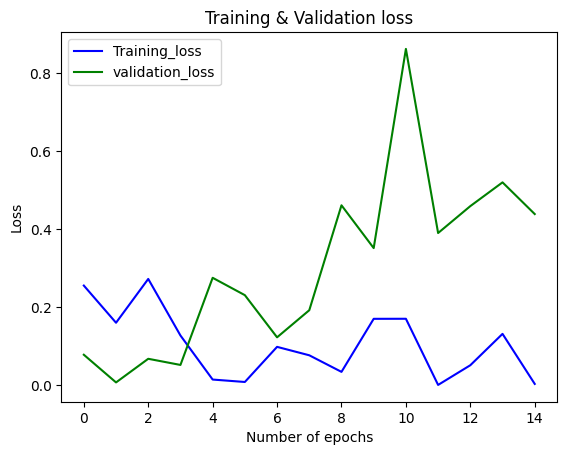

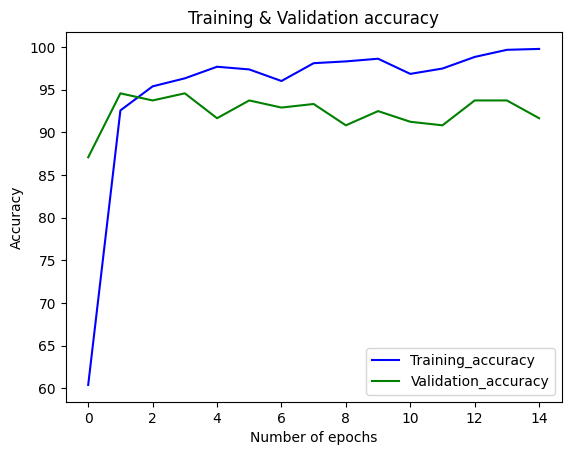

In [23]:
# visualization ## 可以是化的部分了
training_loss = [loss.item() for loss in training_loss]
test_loss = [loss.item() for loss in test_loss]
training_accuracy = [loss.item() for loss in training_accuracy]
test_accuracy = [loss.item() for loss in test_accuracy]
plt.plot(range(num_epochs), training_loss, 'b-', label='Training_loss')
plt.plot(range(num_epochs), test_loss, 'g-', label='validation_loss')
plt.title('Training & Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(num_epochs), training_accuracy, 'b-', label='Training_accuracy')
plt.plot(range(num_epochs), test_accuracy, 'g-', label='Validation_accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [24]:
### 我要去儲存模型
torch.save(model,'K_CNN_model.pt')

# 第四段程式碼
我去讀模型，然後把所有的結果繪製出來

In [25]:
import os
import torch
from torchvision import transforms
from PIL import Image
import torch.nn as nn
import matplotlib.pyplot as plt

In [26]:
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        ## Convolution 1 , input_shape=(3,128, 128)
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0) #捲機後的大小(16, 124,124) ，算法 (128-5)/ 1 + 1 = 124
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0) ## 捲機後的大小(32, 120, 120 )  ，算法 (124 - 5 ) /1 + 1 = 120
        self.relu1 = nn.ReLU()  ## activation
        ## Max poo1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)  ## 輸入的形狀是 (32, 120, 120) ，池化後的形狀是(32, 60,60 )，  算法 120/ 2 = 60
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3 , stride=1, padding=0)  # 輸入的形狀是 (32, 60, 60) ，輸出是 (32, 58,58 ) 算法 (60-3)/1 + 1 = 58
        self.relu2 = nn.ReLU()
        ## Max poo 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)   ## 輸入的形狀是 (64, 58,58)  ， 輸出是 (64, 29, 29) ，算法是 (58/2) = 29
        self.fc1 = nn.Linear(64 * 29 * 29, 128)  ## 關鍵就在這裡是要對到的。
        self.fc2 = nn.Linear(128, 2)  # Output為2，對應於兩類分類

    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.cnn2(out)
        out = self.relu1(out)
        # Max pool 1
        out = self.maxpool1(out)
        out = self.cnn3(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        ## 多思，我這攤平是要怎麼做的???
        out = out.view(out.size(0) , -1)
        out = self.fc1(out)
        out = self.fc2(out)

        return out

In [27]:
# 設定裝置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 加載模型
model = torch.load("./K_CNN_model.pt")
model = model.to(device)
model.eval()  # 設置模型為評估模式

# 定義轉換
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # 調整圖片大小
    transforms.ToTensor()
])

<ipython-input-27-41a8c3c44e67>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("./K_CNN_model.pt")


In [28]:
# 預測函數
def predict_image(image_path):
    image_0 =Image.open(image_path)
    #image = Image.open(image_path).convert("RGB")  # 確保圖片為 RGB
    image = image_0.convert("RGB")
    image = transform(image).unsqueeze(0)  # 增加一個 batch 維度
    image = image.to(device)

    with torch.no_grad():  # 停用梯度計算
        output = model(image)
        _, predicted = torch.max(output, 1)  # 取得預測類別
    return image_0,predicted.item()


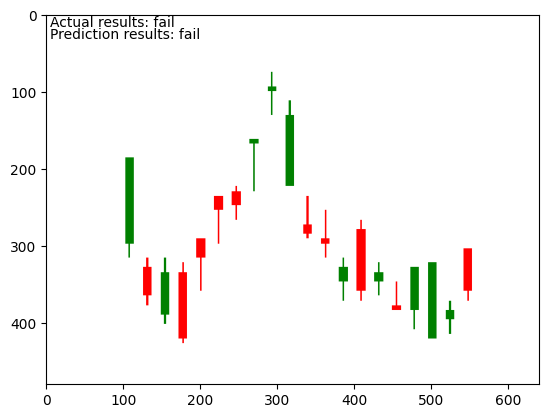

In [29]:
# 遍歷 val 資料夾
tong_i = 0
val_dir = "test_folder_path"
for class_folder in os.listdir(val_dir):
    class_path = os.path.join(val_dir, class_folder)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            if img_path.endswith(".png"):
                image_0,prediction = predict_image(img_path)
                #print(img_path[-8: -4])  ## 我這是取得圖片的檔名。我要去判斷它的類別。
                if img_path[-8: -4] == 'rise' :
                    #print('實際是漲')
                    ground_true = 'rise'
                if img_path[-8: -4] == 'fail' :
                    #print('實際是跌')
                    ground_true = 'fail'

                #print(prediction)
                if prediction == 0:
                    predicted_ans = 'fail'
                if prediction == 1:
                    predicted_ans = 'rise'

                plt.imshow(image_0)         # 在圖表中繪製圖片
                plt.text(5,15,
                         'Actual results: '+ground_true)
                plt.text(5,30,
                         'Prediction results: '+predicted_ans)
                #print(f"Image: {img_file}, Prediction: {prediction}")
                if tong_i == 0:  ## 我指到示範一張當範例而已。
                  plt.show()
                  tong_i +=1
                plt.close()

